<a href="https://colab.research.google.com/github/Ashish10Das/Deep_Learning/blob/main/Illustration_tracing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

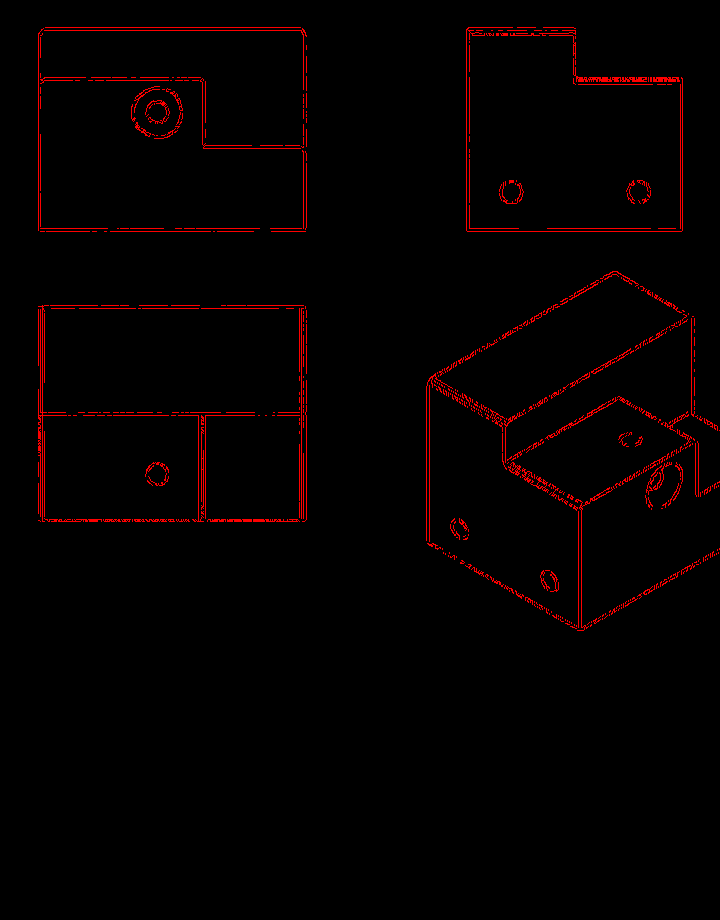

In [123]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

def trace_lines_and_curves(image_path):
    """
    Traces lines and curves in an engineering illustration.

    Args:
        image_path (str): Path to the input image.

    Returns:
        list: A list of detected lines and curves.
    """

    # Load the image
    img = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Could not load image at '{image_path}'")
        return None, None  # Return None for both lines and curves

    # Preprocess the image (adjust parameters as needed)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    edges = cv2.Canny(blurred, 10, 140)

    # Line detection
    lines = cv2.HoughLinesP(edges,1 , np.pi/180, 1, minLineLength=1, maxLineGap=1)
    if lines is not None:
        # Process detected lines (e.g., filter, group, refine)
        pass # Placeholder - replace with your line processing logic

    # Curve detection (example using HoughCircles)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 2, param1=3, param2=3, minRadius=0, maxRadius=0)
    if circles is not None: # Removed extra space before 'is'
        # Process detected circles (e.g., filter, group, refine)
        pass # Placeholder - replace with your circle processing logic

    # More advanced curve detection (e.g., fitting splines or ellipses)
    # ...

    # Post-processing (e.g., handle intersections, remove noise)
    # ...

    # Output the detected lines and curves (e.g., save to file, display)
    # ...

    return lines, circles  # Or other data structures to represent detected shapes

# Example usage
image_path = 'draw4.png'
lines, curves = trace_lines_and_curves(image_path) # Uncomment to use
# Print the results (or process them further)
#print("Lines:", lines)
#print("Curves:", curves)
image_size = (920,720)
img = np.zeros(image_size + (3,), dtype=np.uint8)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 1)
#for circle in curves:
    #x, y, r = circle[0]
    #cv2.circle(img, (int(x), int(y)), int(r), (0, 255, 0),1 )
cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

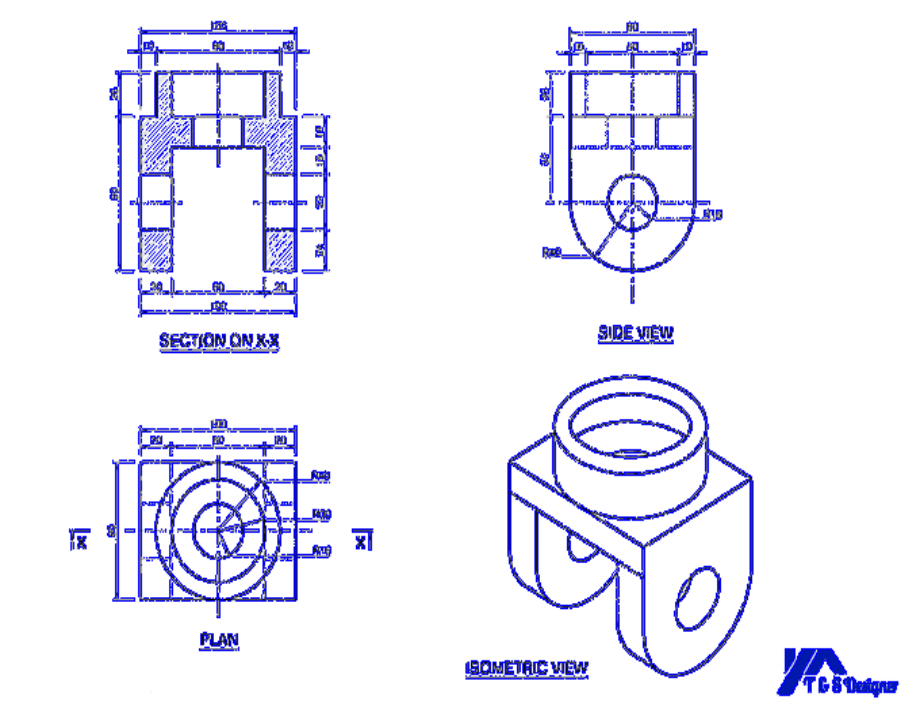

In [138]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('draw3.jpg', cv2.IMREAD_COLOR)
# Convert the image to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Find the edges in the image using canny detector
edges = cv2.Canny(gray, 50, 100)
# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1.5, np.pi/180, 1, minLineLength=0.5, maxLineGap=0.5)
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 1)

# Show result
img = cv2.resize(img, dsize=(920, 720))
cv2_imshow(img)

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

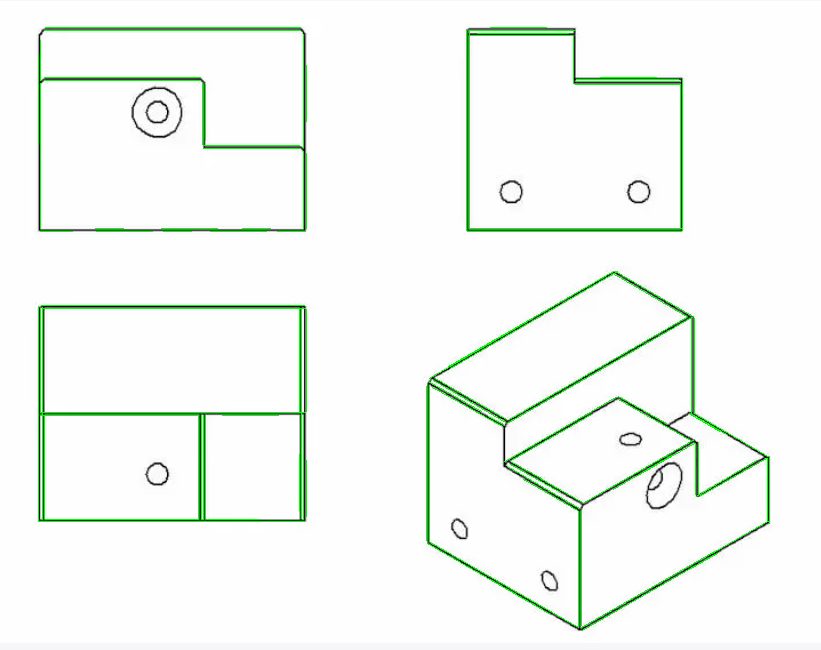

In [117]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow


img = cv2.imread('draw4.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Improved preprocessing
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
edges = cv2.Canny(blurred, 50, 150)

# Adjust HoughLinesP parameters
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=1, maxLineGap=1)
min_length =50
# Line filtering (example)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # Filter lines based on length, angle, or other criteria
        if (x2 - x1)**2 + (y2 - y1)**2 > min_length:  # Minimum length filter
            cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 1)

cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()
